In [1]:
import h5py as h5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.6 * fs,
          'ytick.labelsize': 0.6 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

In [4]:
# read in mpcorb data and get (a, e, i)
mpcorb = pd.read_hdf("../catalogues/mpcorb.h5")
mpc_aei = np.array([mpcorb.a, mpcorb.e, mpcorb.i]).T

In [3]:
densities = np.load("small_densities.npy")

In [53]:
a = np.logspace(-0.5, 2.0, 50)
e = np.linspace(0, 1, 51)
i = np.linspace(0, 180, 52)

grid_shape = (len(a), len(e), len(i))

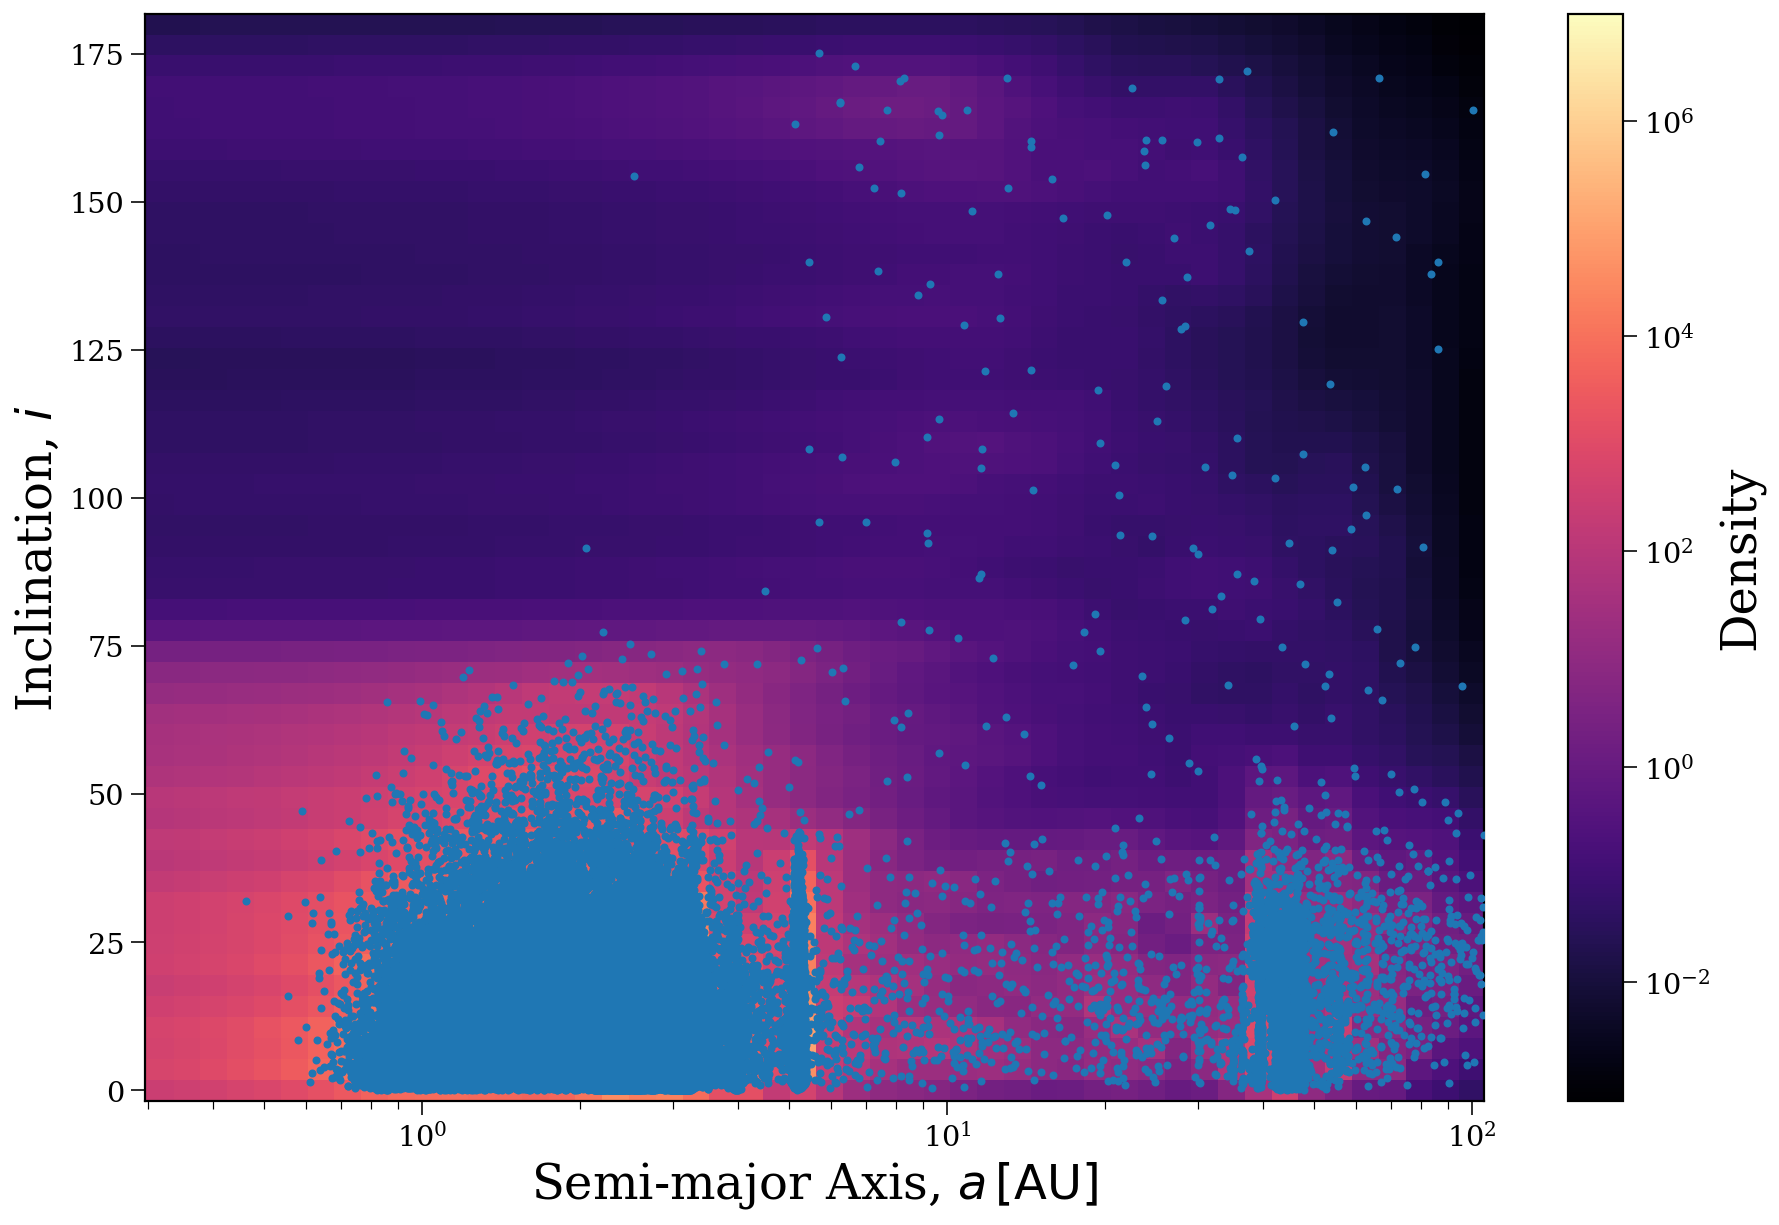

In [51]:
X, Y = np.meshgrid(a, i)
img = densities.reshape(grid_shape).sum(axis=1).T

fig, ax = plt.subplots(figsize=(15, 10))

mesh = ax.pcolormesh(X, Y, img, shading="nearest", norm=LogNorm(), cmap="magma")
cbar = fig.colorbar(mesh, label="Density")

ax.set_xscale("log")

xlims = ax.get_xlim()
ax.scatter(mpcorb.a, mpcorb.i, marker=".", zorder=100)
ax.set_xlim(xlims)

ax.set_xlabel(r"Semi-major Axis, $a\, [\rm AU]$")
ax.set_ylabel(r"Inclination, $i$")

plt.show()

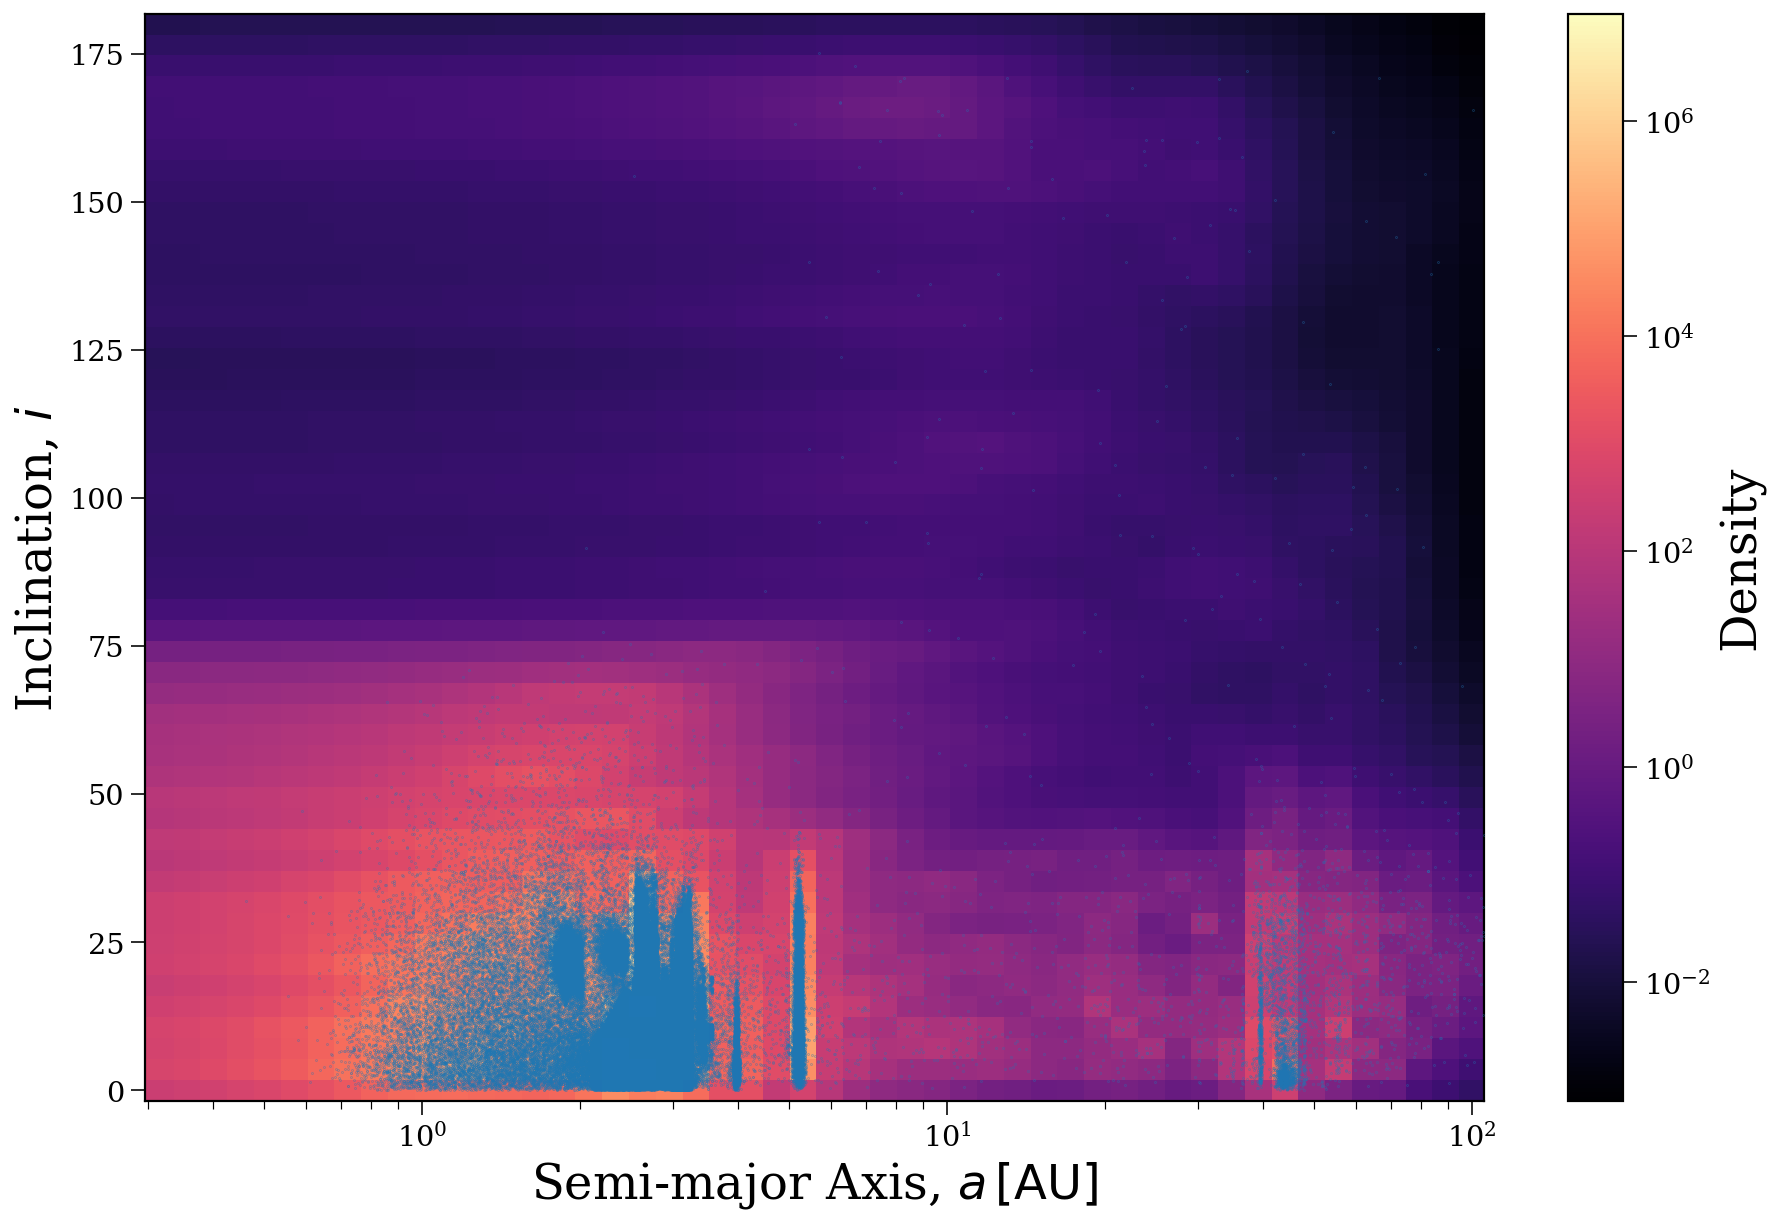

In [55]:
X, Y = np.meshgrid(a, i)
img = densities.reshape(grid_shape).sum(axis=1).T

fig, ax = plt.subplots(figsize=(15, 10))

mesh = ax.pcolormesh(X, Y, img, shading="nearest", norm=LogNorm(), cmap="magma")
cbar = fig.colorbar(mesh, label="Density")

ax.set_xscale("log")

xlims = ax.get_xlim()
ax.scatter(mpcorb.a, mpcorb.i, marker=".", zorder=100, s=0.1)
ax.set_xlim(xlims)

ax.set_xlabel(r"Semi-major Axis, $a\, [\rm AU]$")
ax.set_ylabel(r"Inclination, $i$")

plt.show()